# Lego Data Analysis

In this project I do some basic data analysis to a lego dataset from the website "Rebrickable" (link to the dataset: https://rebrickable.com/downloads/). The data I downloaded from this website contains information such as the color of lego parts, the sets that have been released, the themes of the sets, and an inventory of the parts that have been produced by Lego. I also answer some questions that I thought would be interesting to explore.

In [100]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [101]:
# Data Retrieval
sets = pd.read_csv('sets.csv')
themes = pd.read_csv('themes.csv')
colors = pd.read_csv('colors.csv')
inv_parts = pd.read_csv('inventory_parts.csv')


In [102]:
# Data types
sets.dtypes

set_num      object
name         object
year          int64
theme_id      int64
num_parts     int64
img_url      object
dtype: object

In [103]:
themes.dtypes

id             int64
name          object
parent_id    float64
dtype: object

In [104]:
colors.dtypes

id           int64
name        object
rgb         object
is_trans    object
dtype: object

In [105]:
inv_parts.dtypes

inventory_id     int64
part_num        object
color_id         int64
quantity         int64
is_spare        object
img_url         object
dtype: object

In [106]:
# Checking for null values

print('sets nullvalues: \n',sets.isnull().sum(),'\n')
print('colors nullvalues: \n',colors.isnull().sum(),'\n')
print('themes nullvalues: \n',themes.isnull().sum(),'\n')
print('inv parts nullvalues: \n',inv_parts.isnull().sum(),'\n')

sets nullvalues: 
 set_num      0
name         0
year         0
theme_id     0
num_parts    0
img_url      0
dtype: int64 

colors nullvalues: 
 id          0
name        0
rgb         0
is_trans    0
dtype: int64 

themes nullvalues: 
 id             0
name           0
parent_id    141
dtype: int64 

inv parts nullvalues: 
 inventory_id       0
part_num           0
color_id           0
quantity           0
is_spare           0
img_url         8453
dtype: int64 



In [107]:
# Dropping URL columns, I don't really want them there and they aren't necessary
del(sets['img_url'])
del(inv_parts['img_url'])

In [108]:
sets.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1979,67,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [109]:
inv_parts.head()

,inventory_id,part_num,color_id,quantity,is_spare
0,1,48379c01,72,1,f
1,1,48395,7,1,f
2,1,stickerupn0077,9999,1,f
3,1,upn0342,0,1,f
4,1,upn0350,25,1,f


In [110]:
# Shape of datasets

sets_rows = sets.shape[0]
sets_cols = sets.shape[1]

colors_rows = colors.shape[0]
colors_cols = colors.shape[1]

themes_rows = themes.shape[0]
themes_cols = themes.shape[1]

invParts_rows = inv_parts.shape[0]
invParts_cols = inv_parts.shape[1]

print("Sets has",sets_rows,"rows; and",sets_cols,"columns")
print("Colors has",colors_rows,"rows; and",colors_cols,"columns")
print("Themes has",themes_rows,"rows; and",themes_cols,"columns")
print("Inventory Parts has",invParts_rows,"rows; and",invParts_cols,"columns")

Sets has 19956 rows; and 5 columns
Colors has 217 rows; and 4 columns
Themes has 458 rows; and 3 columns
Inventory Parts has 1070962 rows; and 5 columns


### What are the total number of parts per Lego theme?

In [111]:
# Merge Data
sets_themes = pd.merge(sets, themes, how = 'left', left_on = 'theme_id', right_on = 'id', suffixes = ('_sets', '_themes'))
sets_themes.head()

,set_num,name_sets,year,theme_id,num_parts,id,name_themes,parent_id
0,001-1,Gears,1965,1,43,1,Technic,NaN
1,0011-2,Town Mini-Figures,1979,67,12,67,Classic Town,50.0
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0,199,Lion Knights,186.0
3,0012-1,Space Mini-Figures,1979,143,12,143,Supplemental,126.0
4,0013-1,Space Mini-Figures,1979,143,12,143,Supplemental,126.0


In [112]:
# Answer
parts_per_theme = sets_themes.groupby('name_themes').sum('num_parts').reset_index()
parts_per_theme = parts_per_theme[['name_themes', 'num_parts']].sort_values('num_parts', ascending = False)
parts_per_theme.head(10)

,name_themes,num_parts
317,Technic,234807
303,Star Wars,230447
216,Ninjago,101853
122,Friends,101250
346,Ultimate Collector Series,98625
71,Creator Expert,79053
152,Icons,71581
70,Creator 3-in-1,68325
139,Harry Potter,68247
174,LEGO Ideas and CUUSOO,58965


### What is the total number of parts per year?

In [113]:
# Answer
parts_per_year = sets_themes.groupby('year').sum('num_parts').reset_index()
parts_per_year = parts_per_year[['year', 'num_parts']].sort_values('num_parts', ascending = False)
parts_per_year.head(10)

,year,num_parts
70,2021,265013
71,2022,258467
69,2020,212069
68,2019,191839
66,2017,178360
67,2018,171569
65,2016,159135
64,2015,148904
63,2014,130941
62,2013,110137


### How many sets have been released each century?

In [114]:

unique_yr = sets_themes['year'].unique()
unique_yr.sort()
unique_yr

array([1949, 1950, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961,
       1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972,
       1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020, 2021, 2022, 2023], dtype=int64)

In [115]:
## create centuries column
sets_themes['Century'] = np.where(sets_themes['year'] >= 2000, '21st Century', '20th Century')
sets_themes.head(15)

,set_num,name_sets,year,theme_id,num_parts,id,name_themes,parent_id,Century
0,001-1,Gears,1965,1,43,1,Technic,NaN,20th Century
1,0011-2,Town Mini-Figures,1979,67,12,67,Classic Town,50.0,20th Century
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0,199,Lion Knights,186.0,20th Century
3,0012-1,Space Mini-Figures,1979,143,12,143,Supplemental,126.0,20th Century
4,0013-1,Space Mini-Figures,1979,143,12,143,Supplemental,126.0,20th Century
5,0014-1,Space Mini-Figures,1979,143,12,143,Supplemental,126.0,20th Century
6,0015-1,Space Mini-Figures,1979,143,18,143,Supplemental,126.0,20th Century
7,0016-1,Castle Mini Figures,1979,189,15,189,Classic Castle,186.0,20th Century
8,002-1,4.5V Samsonite Gears Motor Set,1965,1,3,1,Technic,NaN,20th Century
9,002253963-1,Legend of Chima: Corbeaux et Gorilles,2013,497,4,497,Books,NaN,21st Century


In [116]:
# Answer
sets_per_century = sets_themes.groupby('Century').count().reset_index()
sets_per_century[['Century','set_num']]

,Century,set_num
0,20th Century,4571
1,21st Century,15385


### How many sets have been released each year?

In [117]:
# answer
sets_per_year = sets_themes.groupby('year').count().reset_index()
sets_per_year[['year','set_num']]

,year,set_num
0,1949,5
1,1950,6
2,1953,4
3,1954,14
4,1955,37
...,...,...
68,2019,947
69,2020,967
70,2021,1091
71,2022,820


 I have decided to plot this information since I believe the amount of sets produced by Lego is a good indicator, albeit not the only one, of how well their bussiness has performed over the years; or rather, how much they've grown as a company. I have decided not to include the last datapoint as it refers to the year 2023 and that information is incomplete as of now so it would be of no use when trying to judge the performace of this bussiness.

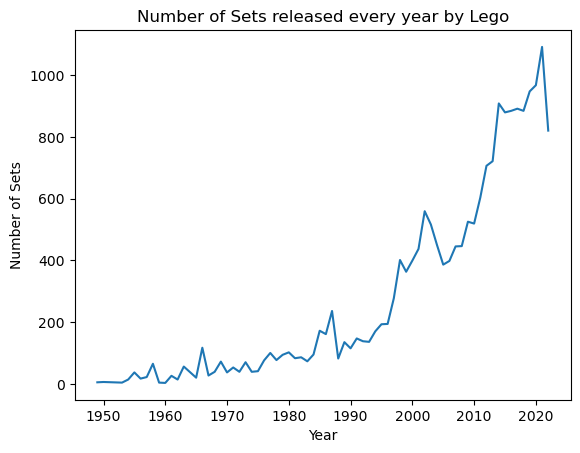

In [118]:
sets_per_year = sets_per_year[['year','set_num']]
sets_per_year = sets_per_year.drop(72)
plt.plot(sets_per_year['year'], sets_per_year['set_num'])
plt.title('Number of Sets released every year by Lego')
plt.xlabel('Year')
plt.ylabel('Number of Sets')
plt.show()

### What is the percentage of sets released in the 21st century that are star wars themed?

In [119]:
xx1_c = sets_themes[sets_themes['Century'] == '21st Century']
star_wars = xx1_c[xx1_c['name_themes'].str.contains('Star Wars')]
star_wars

,set_num,name_sets,year,theme_id,num_parts,id,name_themes,parent_id,Century
2024,20006-1,Clone Turbo Tank,2008,158,64,158,Star Wars,NaN,21st Century
2035,20007-1,Republic Attack Cruiser,2009,158,84,158,Star Wars,NaN,21st Century
2048,20009-1,AT-TE Walker,2009,158,94,158,Star Wars,NaN,21st Century
2050,20010-1,Republic Gunship,2009,158,94,158,Star Wars,NaN,21st Century
2057,20016-1,Imperial Shuttle,2010,158,70,158,Star Wars,NaN,21st Century
...,...,...,...,...,...,...,...,...,...
19915,VP-4,Star Wars Co-Pack,2000,158,0,158,Star Wars,NaN,21st Century
19918,VP-8,Star Wars Co-Pack,2000,158,0,158,Star Wars,NaN,21st Century
19951,XWING-1,Mini X-Wing Fighter,2019,158,60,158,Star Wars,NaN,21st Century
19952,XWING-2,X-Wing Trench Run,2019,158,52,158,Star Wars,NaN,21st Century


In [120]:
# Answer
percentage_star_wars = star_wars.shape[0]/xx1_c.shape[0] * 100
print(percentage_star_wars,'%')

5.5573610659733506 %


### What were the most popular themes each year during the 20th century?

In [121]:
# Answer
xx_c = sets_themes[sets_themes['Century'] == '20th Century']

pop_theme_yr = xx_c.groupby(['year', 'name_themes']).count().reset_index()
pop_theme_yr = pop_theme_yr[['year','name_themes','set_num']].sort_values('set_num', ascending = False)
pop_theme_yr.drop_duplicates('year').sort_values('year', ascending = False)

,year,name_themes,set_num
783,1999,Technic,31
737,1998,Technic,27
685,1997,Technic,28
627,1996,Classic Town,20
599,1995,Freestyle,28
579,1994,Technic,35
539,1993,Classic Town,21
525,1992,Technic,25
488,1991,Classic Town,23
463,1990,Classic Town,27


### What were the most popular themes of the 20th century as a whole

In [122]:
#Answer
most_pop_theme = pop_theme_yr['name_themes'].value_counts()
most_pop_theme

Supplemental     47
Basic Set        38
Technic          24
Town             22
Service Packs    21
                 ..
RoboForce         1
Aquaraiders I     1
Dark Forest       1
eLAB              1
Aquazone          1
Name: name_themes, Length: 137, dtype: int64

### What is the most produced color of Legos?

In [123]:
color_inventory = pd.merge(inv_parts, colors, how = 'left', left_on = 'color_id', right_on = 'id')
color_inventory

,inventory_id,part_num,color_id,quantity,is_spare,id,name,rgb,is_trans
0,1,48379c01,72,1,f,72,Dark Bluish Gray,6C6E68,f
1,1,48395,7,1,f,7,Light Gray,9BA19D,f
2,1,stickerupn0077,9999,1,f,9999,[No Color/Any Color],05131D,f
3,1,upn0342,0,1,f,0,Black,05131D,f
4,1,upn0350,25,1,f,25,Orange,FE8A18,f
...,...,...,...,...,...,...,...,...,...
1070957,153998,30598pr0004,2,1,f,2,Green,237841,f
1070958,153999,30598pr0005,22,1,f,22,Purple,81007B,f
1070959,154000,30598pr0006,0,1,f,0,Black,05131D,f
1070960,154001,30598pr0007,73,1,f,73,Medium Blue,5A93DB,f


In [124]:
color_inventory.rename(columns = {'name': 'color_name'}, inplace = True)
color_inventory

,inventory_id,part_num,color_id,quantity,is_spare,id,color_name,rgb,is_trans
0,1,48379c01,72,1,f,72,Dark Bluish Gray,6C6E68,f
1,1,48395,7,1,f,7,Light Gray,9BA19D,f
2,1,stickerupn0077,9999,1,f,9999,[No Color/Any Color],05131D,f
3,1,upn0342,0,1,f,0,Black,05131D,f
4,1,upn0350,25,1,f,25,Orange,FE8A18,f
...,...,...,...,...,...,...,...,...,...
1070957,153998,30598pr0004,2,1,f,2,Green,237841,f
1070958,153999,30598pr0005,22,1,f,22,Purple,81007B,f
1070959,154000,30598pr0006,0,1,f,0,Black,05131D,f
1070960,154001,30598pr0007,73,1,f,73,Medium Blue,5A93DB,f


In [125]:
# Answer
pop_color = color_inventory.groupby('color_name').sum().reset_index()
pop_color = pop_color[['color_name','quantity']].sort_values('quantity', ascending = False)
pop_color

C:\Users\josea\AppData\Local\Temp\ipykernel_9352\1448189944.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pop_color = color_inventory.groupby('color_name').sum().reset_index()


,color_name,quantity
1,Black,679062
58,Light Bluish Gray,410343
199,White,399791
23,Dark Bluish Gray,285529
137,Red,268411
...,...,...
144,Rust Orange,1
68,Light Tan,1
49,Glitter Trans-Orange,1
41,Fabuland Orange,1
